<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ok good progress! but need to beef it up, need more data, eg read literature what affects your variables of interest and add them; may talk to prakash, 
he's doint country level development stuff too

but the submission was late so only partial credit

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In this project I'm planning to explore the relationship among a country's HDI and its gender development and gender inequality condition. My hypothesis is the country with higher scores in gender development and lower scores in gender inequality will have a better performance in HDI.

Sources from: https://hdr.undp.org/data-center/documentation-and-downloads


In [2]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/raw/main/development.xlsx","development")

('development', <http.client.HTTPMessage at 0x7f4a14536400>)

In [3]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'development', 'sample_data']

In [4]:
development = pd.read_excel('development')

In [5]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/raw/main/inequality.xlsx","inequality")

('inequality', <http.client.HTTPMessage at 0x7f4a15e36d30>)

In [6]:
inequality=pd.read_excel("inequality")

In [12]:
mergedOuter = pd.merge(development, inequality, how='outer', left_on=['Country'], right_on=['Country'], indicator=True)
#mergedOuter
#aok after merge always need to investigate!!!
mergedOuter['_merge'].value_counts()

both          191
right_only      5
left_only       0
Name: _merge, dtype: int64

In [14]:
mergedOuter[mergedOuter._merge=='right_only'] #aok these are the places on right only; but thats fine, everything from left did merge! 

,HDI rank_x,Country,Value,HDI rank_y,Inequality Value,_merge
191,NaN,NaN,NaN,NaN,NaN,right_only
192,NaN,Korea (Democratic People's Rep. of),NaN,NaN,..,right_only
193,NaN,Monaco,NaN,NaN,..,right_only
194,NaN,Nauru,NaN,NaN,..,right_only
195,NaN,Somalia,NaN,NaN,..,right_only


In [15]:
del mergedOuter['HDI rank_y']

In [16]:
mergedOuter

,HDI rank_x,Country,Value,Inequality Value,_merge
0,1.0,Switzerland,0.967,0.018,both
1,2.0,Norway,0.983,0.016,both
2,3.0,Iceland,0.976,0.043,both
3,4.0,"Hong Kong, China (SAR)",0.976,..,both
4,5.0,Australia,0.968,0.073,both
...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,right_only
192,NaN,Korea (Democratic People's Rep. of),NaN,..,right_only
193,NaN,Monaco,NaN,..,right_only
194,NaN,Nauru,NaN,..,right_only


In [17]:
pd1=mergedOuter

In [18]:
del pd1['_merge']

In [19]:
pd1.rename(columns={'HDI rank_x': 'HDI rank','Value': 'Gender Development Value','Inequality Value': 'Gender Inequality Value'},inplace=True)

In [20]:
pd1

,HDI rank,Country,Gender Development Value,Gender Inequality Value
0,1.0,Switzerland,0.967,0.018
1,2.0,Norway,0.983,0.016
2,3.0,Iceland,0.976,0.043
3,4.0,"Hong Kong, China (SAR)",0.976,..
4,5.0,Australia,0.968,0.073
...,...,...,...,...
191,NaN,NaN,NaN,NaN
192,NaN,Korea (Democratic People's Rep. of),NaN,..
193,NaN,Monaco,NaN,..
194,NaN,Nauru,NaN,..


In [21]:
pd1 = pd1.replace('..', np.nan)

In [ ]:
pd1.isna().sum()

HDI rank                     5
Country                      1
Gender Development Value    24
Gender Inequality Value     26
dtype: int64

In [22]:
count_row = pd1.shape[0]  
count_row

196

In [ ]:
#replace null values with the mean of the variable
pd1 = pd1.fillna(pd1.mean())

<ipython-input-54-1e1531c69794>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd1 = pd1.fillna(pd1.mean())


In [ ]:
pd1.head()

,HDI rank,Country,Gender Development Value,Gender Inequality Value
0,1.0,Switzerland,0.967,0.018000
1,2.0,Norway,0.983,0.016000
2,3.0,Iceland,0.976,0.043000
3,4.0,"Hong Kong, China (SAR)",0.976,0.344376
4,5.0,Australia,0.968,0.073000


In [ ]:
pd1.describe()

,HDI rank,Gender Development Value,Gender Inequality Value
count,196.000000,196.000000,196.000000
mean,95.811518,0.947285,0.344376
std,54.593661,0.061717,0.183495
min,1.000000,0.496000,0.013000
25%,49.750000,0.927000,0.202250
50%,95.811518,0.956000,0.344376
75%,140.750000,0.986250,0.483250
max,191.000000,1.034000,0.820000


In [23]:
pd1.dtypes

HDI rank                    float64
Country                      object
Gender Development Value    float64
Gender Inequality Value     float64
dtype: object

In [24]:
for col in pd1.columns[1:]:
    pd1[col] = pd1[col].apply(pd.to_numeric, errors='coerce')

In [25]:
# show median
cols = pd1.columns.tolist()

for i in cols[2:]:
    print('the median of ',i ,'is ',pd1[i].median())

the median of  Gender Development Value is  0.967
the median of  Gender Inequality Value is  0.363


<ipython-input-26-caa8fc7cacc4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd1['Gender Development Value'], hist = True, kde = True,


<Axes: xlabel='Gender Development Value', ylabel='Density'>

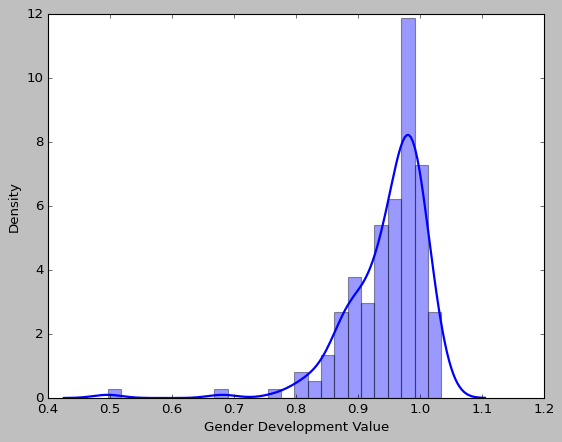

In [26]:
sns.distplot(pd1['Gender Development Value'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

<ipython-input-61-d16e410eff91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd1['Gender Inequality Value'], hist = True, kde = True,


<Axes: xlabel='Gender Inequality Value', ylabel='Density'>

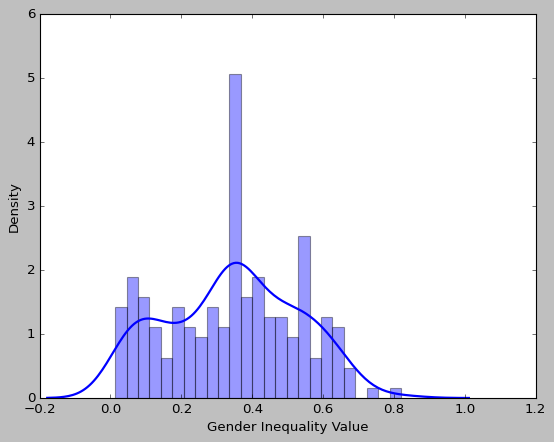

In [ ]:
sns.distplot(pd1['Gender Inequality Value'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

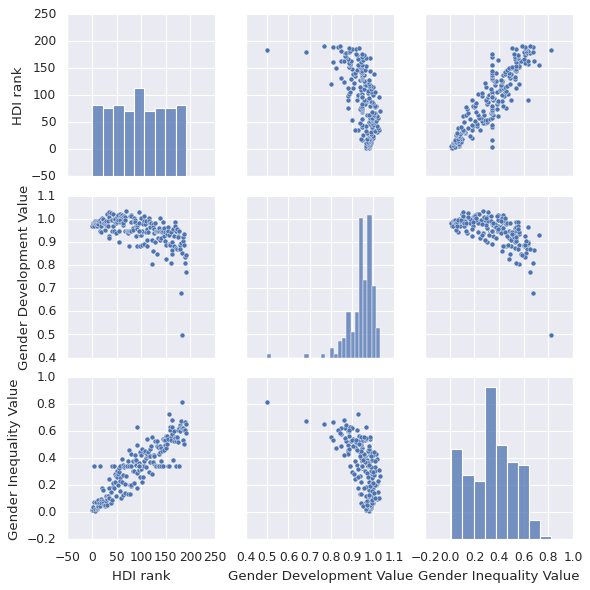

In [ ]:
sns.set()
cols = ['HDI rank',
        'Gender Development Value',
        'Gender Inequality Value']
sns.pairplot(pd1[cols], height = 2.5)
plt.show();

It shows that countries with a higher rank in HDI have lower gender inequality value scores, which means these countries have a better condition in gender equality. And countries with a higher rank in HDI also have higher scores in gender development value. The hypothesis has been proved.

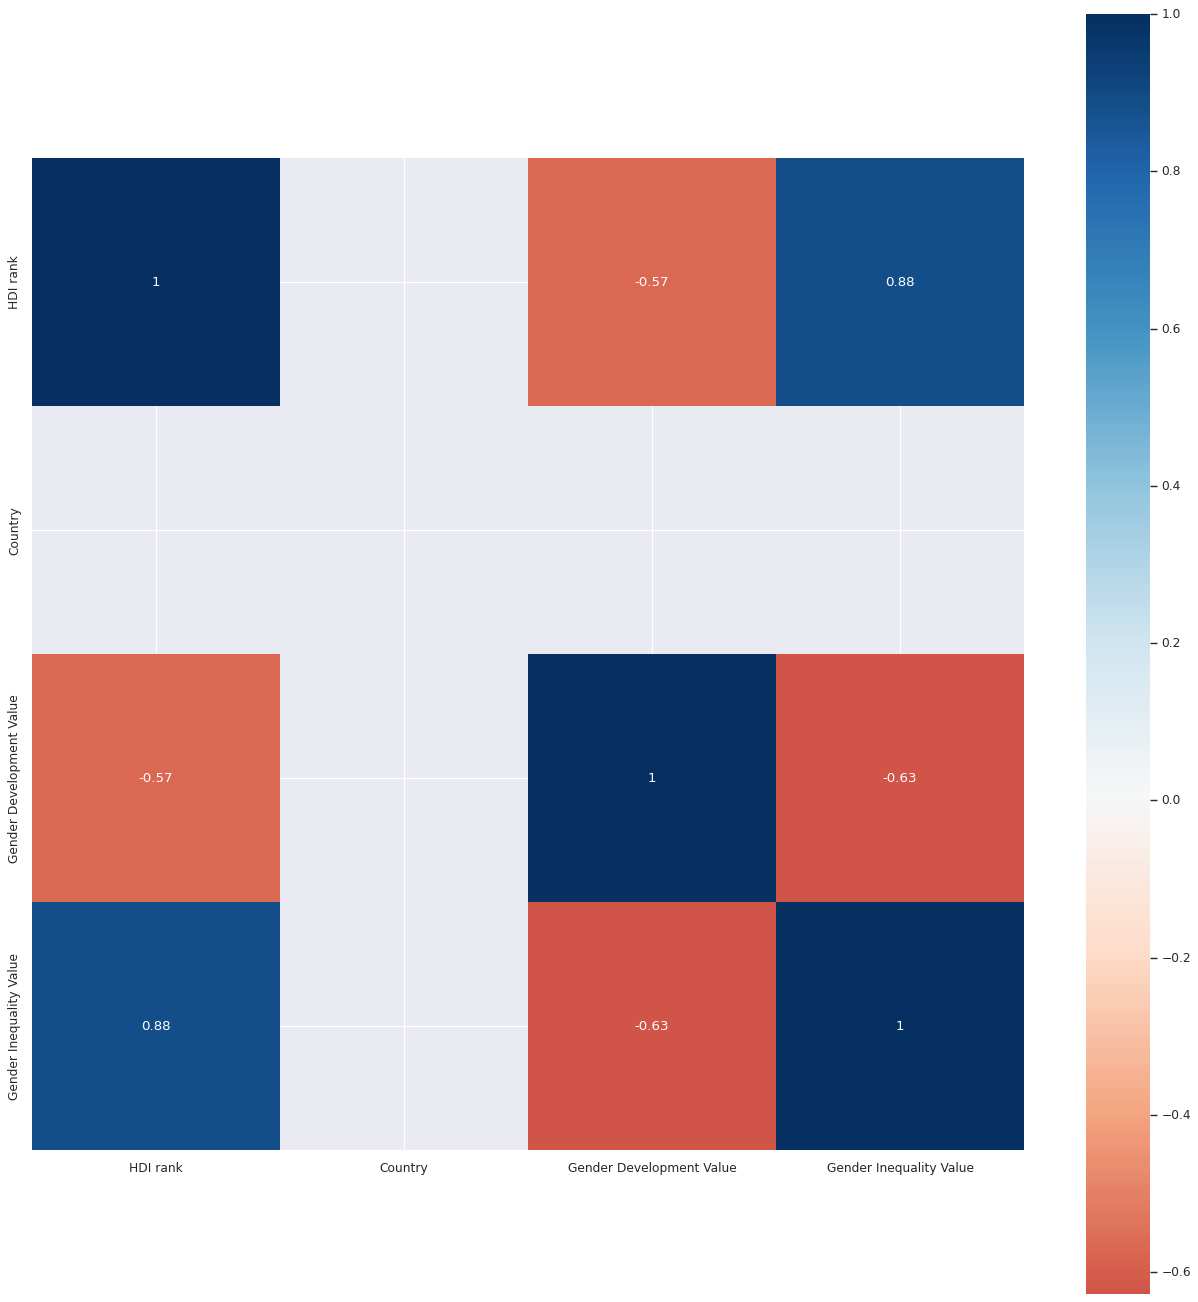

In [ ]:
corrmat = pd1.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);